In [21]:
import sys
from pathlib import Path

PROJECT_ROOT = Path().resolve().parent
sys.path.insert(0, str(PROJECT_ROOT))

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [23]:
from src.config.config import config

In [24]:
df = pd.read_csv(PROJECT_ROOT / "data" / "processed" / "balanced_length_filtered_dataset.csv")

In [ ]:
from src.features.text_metrics import TextMetricCalculator

In [ ]:
# =========================
# BUILD METRICS DATAFRAME
# =========================

def build_metrics_dataframe(
    df: pd.DataFrame,
    text_col: str = "text",
    label_col: str = "generated",
) -> pd.DataFrame:
    rows = []

    for _, row in tqdm(df.iterrows(), total=len(df), desc="Calculating text metrics"):
        calculator = TextMetricCalculator(row[text_col])
        metrics = calculator.all_metrics

        metrics_dict = vars(metrics)
        metrics_dict[label_col] = row[label_col]

        rows.append(metrics_dict)

    return pd.DataFrame(rows)


metrics_df = build_metrics_dataframe(df)

print("metrics_df shape:", metrics_df.shape)
metrics_df.head()


Calculating text metrics: 100%|██████████| 70000/70000 [00:15<00:00, 4387.79it/s]


metrics_df shape: (70000, 15)


,word_count,text_length,sentence_count,avg_sentence_length,avg_word_length,vocab_size,vocab_richness,repetition_ratio,punctuation_ratio,exclamation_ratio,question_ratio,uppercase_word_ratio,entropy,stopwords_ratio,generated
0,312,1452,16,3.586538,4.653846,125,0.400641,0.599359,0.015152,0.001377,0.000000,0.0,6.304388,0.634615,0.0
1,346,2051,18,4.809249,5.927746,187,0.540462,0.459538,0.018528,0.000000,0.000000,0.0,6.945962,0.404624,0.0
2,324,1825,22,4.320988,5.632716,157,0.484568,0.515432,0.043836,0.003288,0.000548,0.0,6.629855,0.515432,0.0
3,354,1832,21,4.084746,5.175141,146,0.412429,0.587571,0.025109,0.000000,0.000000,0.0,6.693811,0.562147,0.0
4,319,1597,17,3.937304,5.006270,127,0.398119,0.601881,0.017533,0.000000,0.000000,0.0,6.480920,0.573668,0.0


In [30]:
METRICS = [
    "word_count",
    "sentence_count",
    "avg_sentence_length",
    "avg_word_length",
    "vocab_richness",
    "repetition_ratio",
    "punctuation_ratio",
    "exclamation_ratio",
    "question_ratio",
    #"uppercase_word_ratio",
    "entropy",
    "stopwords_ratio",
]

LABELS = {0: "Human-written", 1: "AI-generated"}
COLORS = {0: "#4C72B0", 1: "#DD8452"}


def plot_metric_distribution(
    df: pd.DataFrame,
    metric: str,
    label_col: str = "generated",
    log_scale: bool = False,
):
    plt.figure(figsize=(9, 5))

    # clip extreme outliers for readability
    low, high = df[metric].quantile([0.02, 0.98])
    plot_df = df[(df[metric] >= low) & (df[metric] <= high)]

    for label in [0, 1]:
        values = plot_df[plot_df[label_col] == label][metric]

        plt.hist(
            values,
            bins=40,
            density=True,
            alpha=0.45,
            color=COLORS[label],
            label=f"{LABELS[label]}",
            edgecolor="black",
        )

        values.plot(kind="kde", color=COLORS[label], linewidth=2)

    plt.title(metric.replace("_", " ").title(), fontsize=14)
    plt.xlabel(metric.replace("_", " ").title())
    plt.ylabel("Density")

    if log_scale:
        plt.xscale("log")

    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


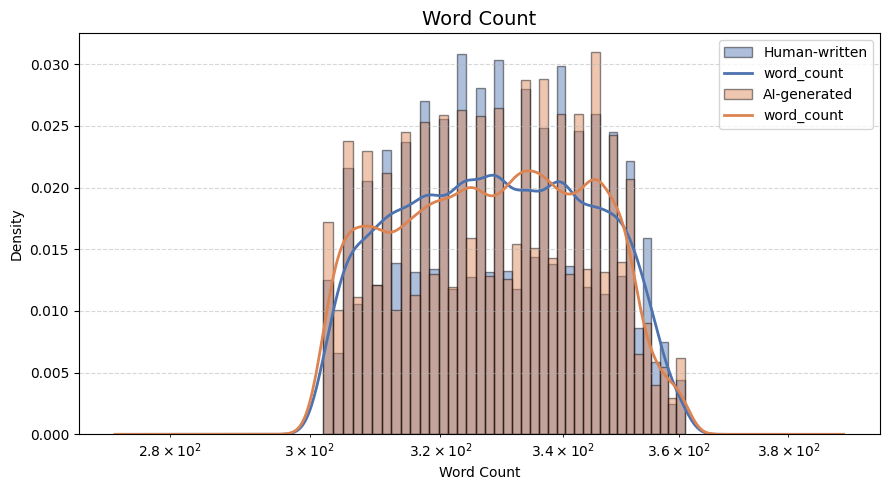

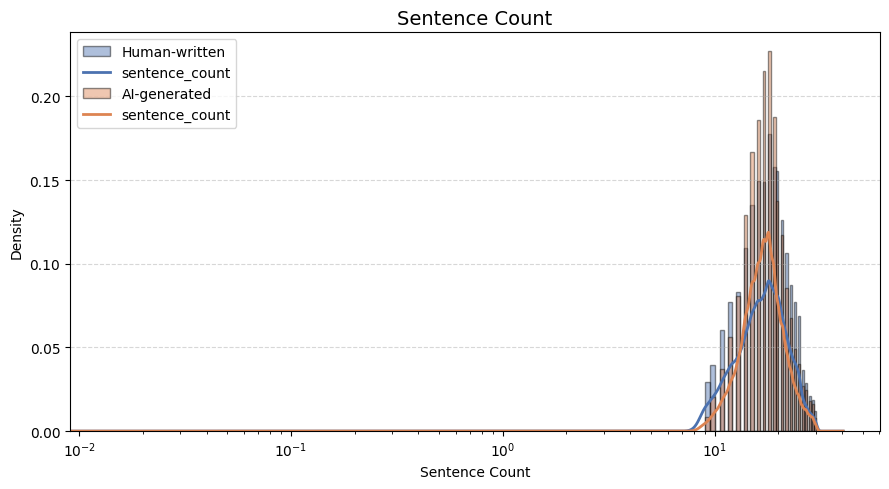

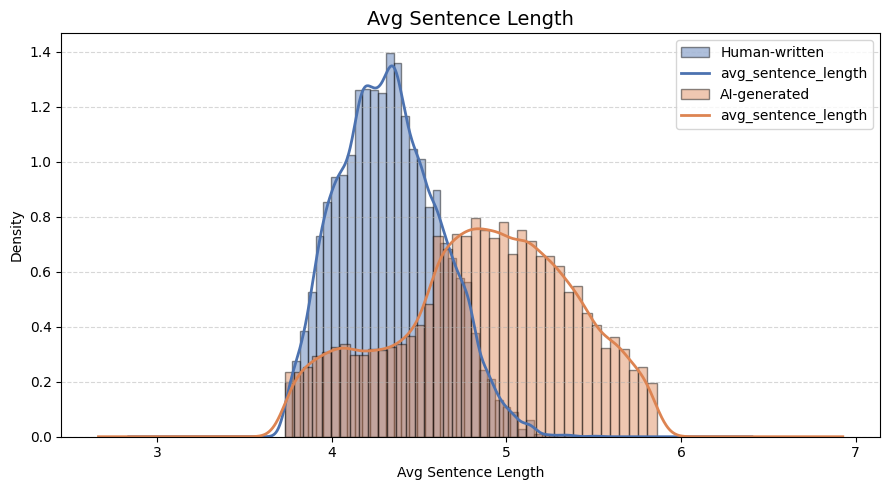

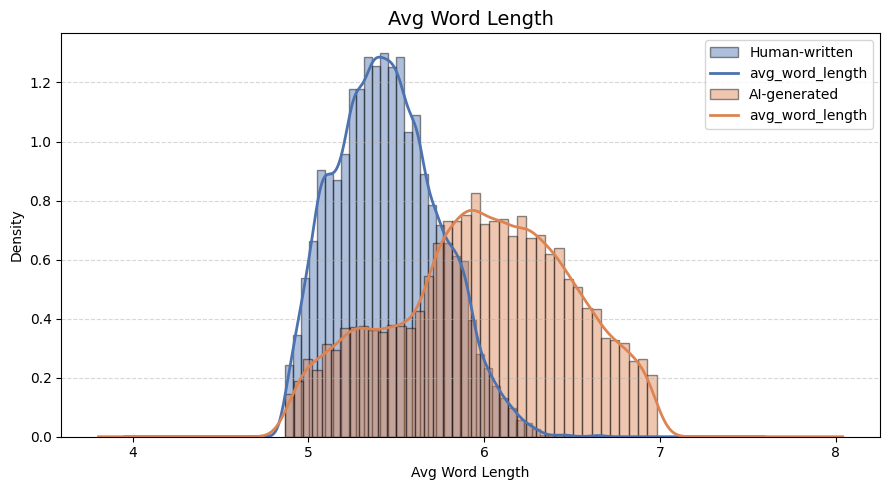

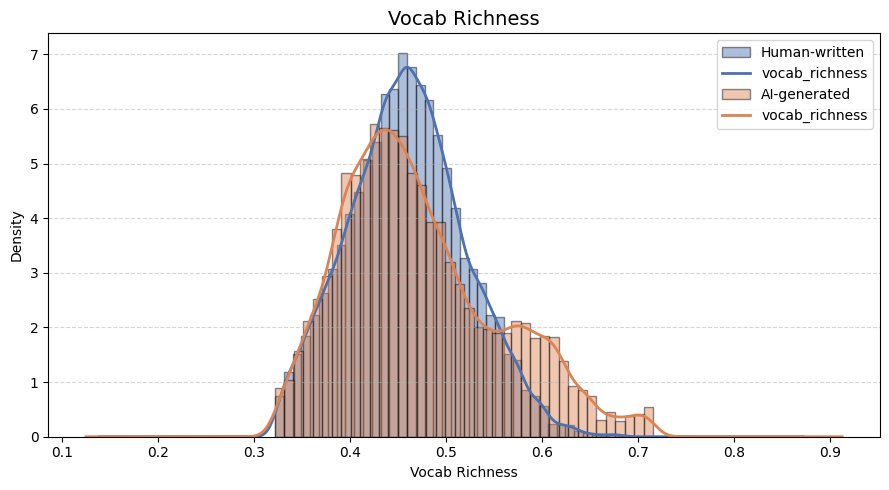

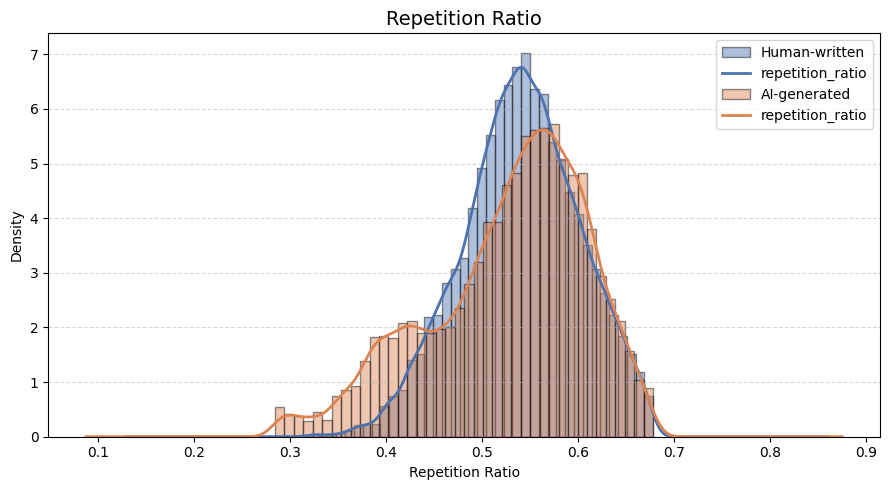

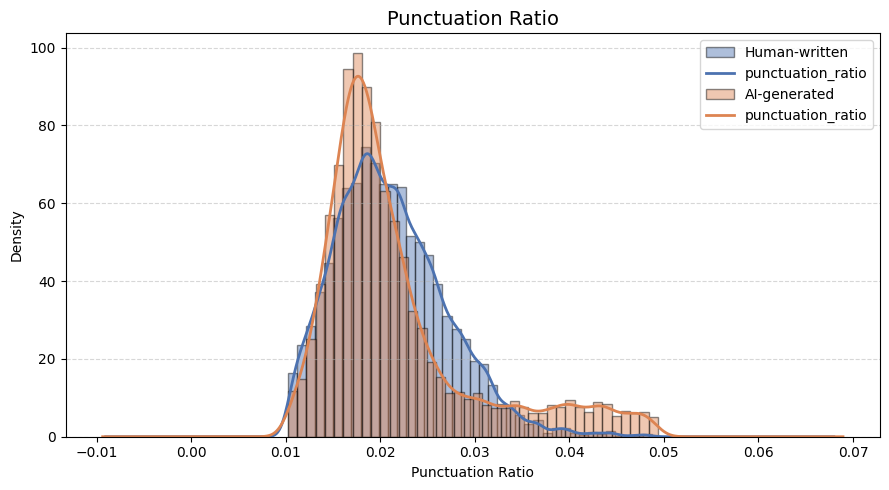

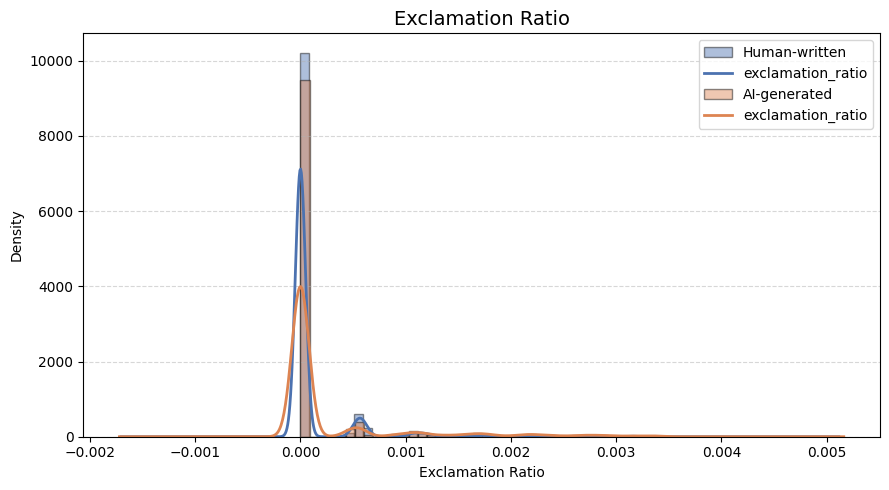

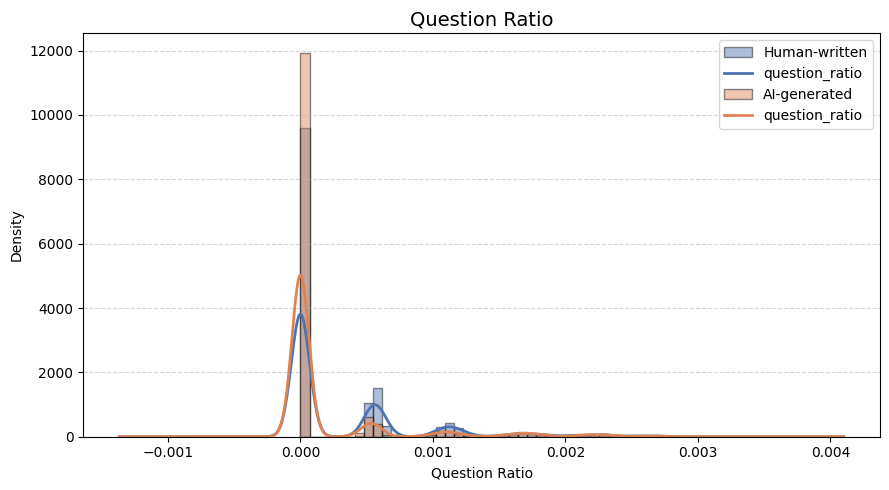

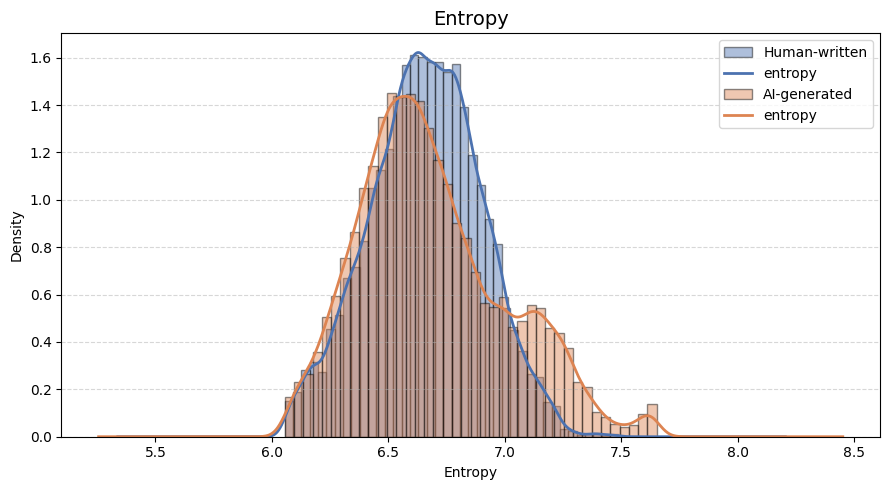

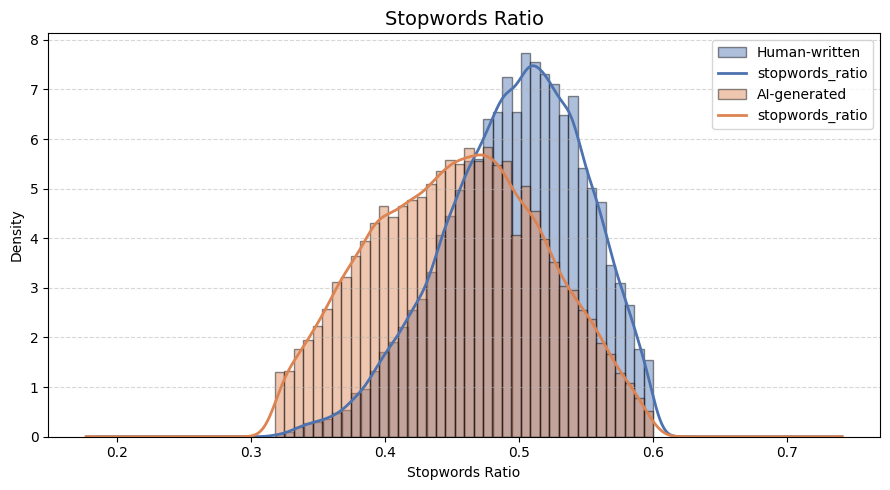

In [31]:
for metric in METRICS:
    plot_metric_distribution(
        metrics_df,
        metric=metric,
        log_scale=metric in {"word_count", "sentence_count"}
    )
